## Bank speeches starter template

The [Kaggle data set](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) used in this project use speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022. Central banks are institutions that define monetary policy. As such, central bank speeches are widely followed and have a major influence on financial markets.

You can also refer to the raw data set and article used [here](https://www.kaggle.com/datasets/magnushansson/central-bank-speeches).

Note that, due to the large number of speeches contained in the data set, you can expect long running times for processing intensive steps such as sentiment analysis when using the full data set (30-60 mins). It is recommended that you reduce the subset of data under review when creating your prototype and then run the full data set through, if required, once the code behaves as expected. You can reduce the data set to, for example, only process data from the United Kingdom (or other countries) or by looking at specific date ranges.

The code is not extensive and you will be expected to use the provided code as a starting point only. You will also need to use your own creativity and logic to identify useful patterns in the data. You can explore sentiment, polarity and entities/keywords, and should use appropriate levels of granularity and aggregation in order to analyse patterns contained in the data.

In [1]:
# Install the necessary libraries.
!pip install nltk
!pip install vaderSentiment
!pip install textblob

In [2]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/orkestro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/orkestro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/orkestro/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/orkestro/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# Load dataset. Change directory as required.
df = pd.read_csv('/Users/orkestro/Downloads/all_speeches.csv')

In [4]:
df.head()

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [5]:
df.country.value_counts()

euro area         2351
united states     1551
united kingdom    1209
japan              755
canada             620
sweden             600
switzerland        351
australia          284
Name: country, dtype: int64

In [6]:
df[df['country']=='united kingdom'].sort_values('date').head()

,reference,country,date,title,author,is_gov,text
4961,r980915a_BOE,united kingdom,1998-09-15,Speech,george,0,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,0,It's a great pleasure to be here in the beauti...
4963,r981021a_BOE,united kingdom,1998-10-21,Impact of the recent turbulence in internation...,king,1,Few industries have suffered more from volatil...
4964,r981101a_BOE,united kingdom,1998-11-01,"Economic policy, with and without forecasts",budd,0,My topic this evening is the use of forecasts ...
4965,r981101b_BOE,united kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,"Six years ago this week, sterling left the exc..."


In [7]:
# Demo: Example of adding a column to calculate the string length per speech.
df['len'] = df['text'].str.len()
df

,reference,country,date,title,author,is_gov,text,len
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,21288
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,18838
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,21100
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,23608
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",25337
...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...,11505
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita...",12816
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...,18600
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to...",14060


In [8]:
# Demo: Convert to lower case and remove punctuation.
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'] = df['text'].str.replace('[^\w\s]','',regex=True)
df

,reference,country,date,title,author,is_gov,text,len
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,they would no doubt argue that to have two obj...,21288
1,r911003a_BOA,australia,1991-10-03,,fraser,0,today i wish to talk about real interest rates...,18838
2,r920314a_BOA,australia,1992-03-14,,fraser,0,i welcome this opportunity to talk about prosp...,21100
3,r920529a_BOA,australia,1992-05-29,,fraser,0,it is a pleasure to have this opportunity to a...,23608
4,r920817a_BOA,australia,1992-08-17,,fraser,0,as a longtime fan of don sanders i am delighte...,25337
...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,it is a pleasure to join this discussion today...,11505
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,thank you chris and thank you for the invitati...,12816
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,thanks to the money marketeers for inviting me...,18600
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,thank you professor jackson and thank you to t...,14060


In [9]:
# Subset the data to reduce processing time.
dfi = df[df['country']=='united kingdom'].sort_values('date').reset_index(drop=True)
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  1209 non-null   object
 1   country    1209 non-null   object
 2   date       1209 non-null   object
 3   title      1209 non-null   object
 4   author     1209 non-null   object
 5   is_gov     1209 non-null   int64 
 6   text       1209 non-null   object
 7   len        1209 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 75.7+ KB


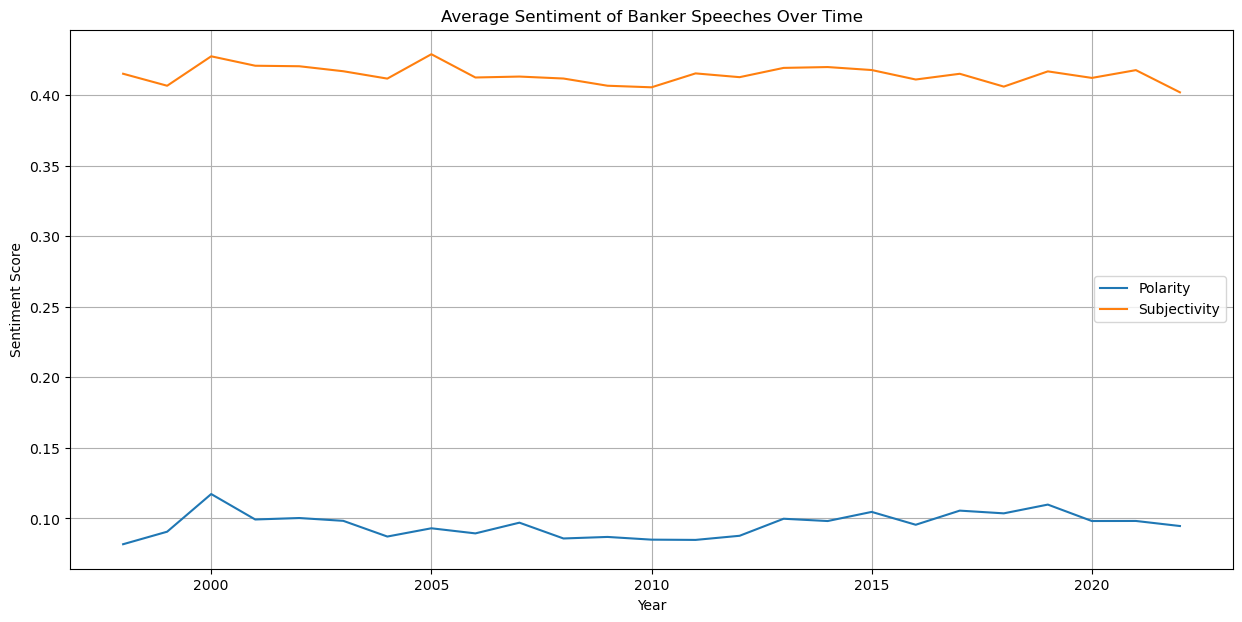

In [13]:
# Use TextBlob to calculate sentiment scores
dfi['polarity'] = dfi['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
dfi['subjectivity'] = dfi['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Convert date from string to datetime
dfi['date'] = pd.to_datetime(dfi['date'])

# Plotting sentiment trends over time
plt.figure(figsize=(15, 7))
dfi.groupby(dfi['date'].dt.year)['polarity'].mean().plot(label="Polarity")
dfi.groupby(dfi['date'].dt.year)['subjectivity'].mean().plot(label="Subjectivity")
plt.title('Average Sentiment of Banker Speeches Over Time')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

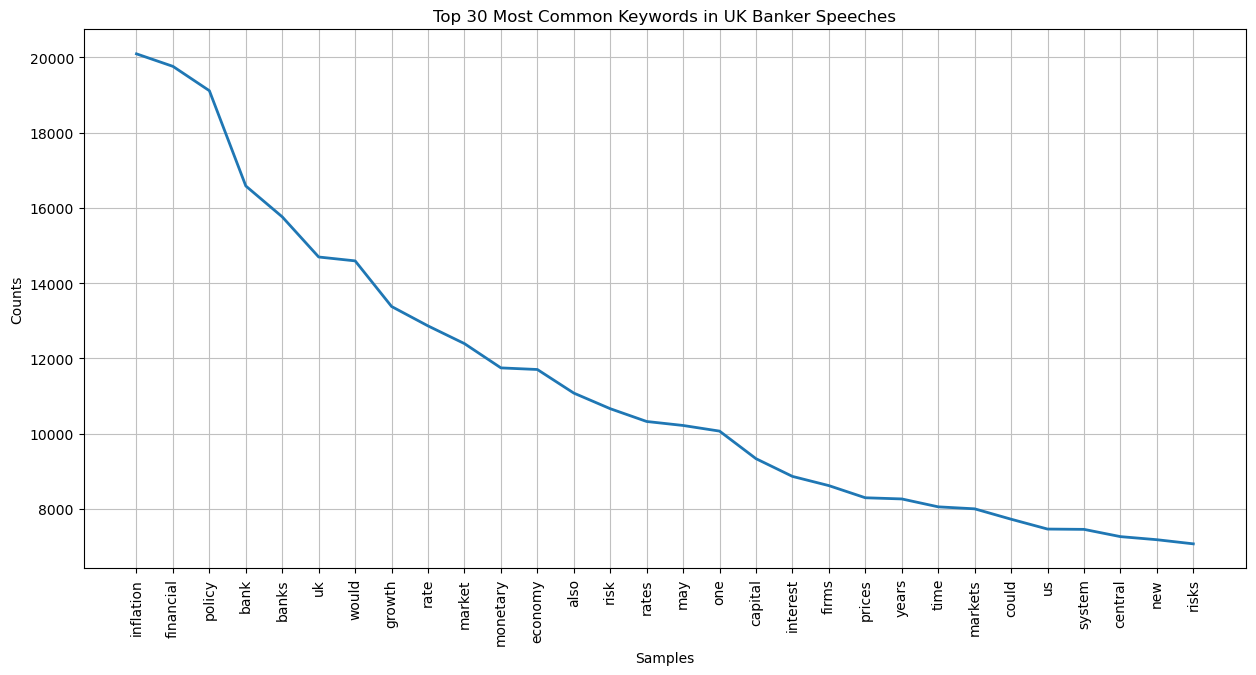

<Axes: title={'center': 'Top 30 Most Common Keywords in UK Banker Speeches'}, xlabel='Samples', ylabel='Counts'>

In [14]:
# Tokenize the speeches and remove stopwords
tokenized_speeches = dfi['text'].apply(lambda x: word_tokenize(x))
tokenized_speeches = tokenized_speeches.apply(lambda x: [word for word in x if word not in stop_words])

# Get most frequent keywords
all_words = [word for speech in tokenized_speeches for word in speech]
fdist = FreqDist(all_words)
plt.figure(figsize=(15, 7))
fdist.plot(30, title="Top 30 Most Common Keywords in UK Banker Speeches")

## Highest Occurring Topics

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming you've loaded your data into the dataframe 'df'
# For example: df = pd.read_csv("your_data.csv")

# Replace 'YOUR_TEXT_COLUMN_NAME' with the name of the column containing the texts
column_name = 'text'

# Define the count vectorizer with specific arguments
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english', max_features=100)
X = vectorizer.fit_transform(df[column_name])
features = vectorizer.get_feature_names_out()

# Get top N topics based on their occurrence
sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in zip(features, list(range(X.shape[1])))]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Display top 10 words/phrases
df_words = pd.DataFrame(words_freq, columns=['Words/Phrases', 'Count'])
print(df_words.head(10))

NameError: name 'df' is not defined

## Exploring Text Length

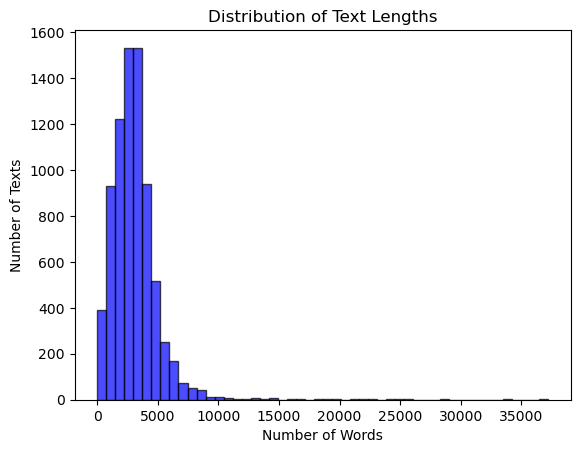

In [24]:
import matplotlib.pyplot as plt

# Calculate text lengths
text_length = [len(text.split()) for text in df['text']]

# Plot the distribution
plt.hist(text_length, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Texts')
plt.show()

## Word Cloud

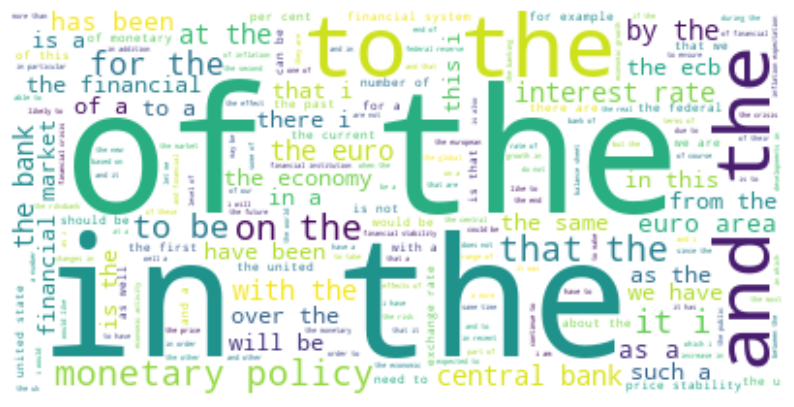

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(stopwords=set(['english']), max_words=200, background_color='white').generate(' '.join(df['text']))

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Bigrams and Trigrams

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a CountVectorizer object for bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=10)  # top 10 bigrams
bigrams = bigram_vectorizer.fit_transform(dfi['text'])
print(bigram_vectorizer.get_feature_names_out())

# Instantiate a CountVectorizer object for trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=10)  # top 10 trigrams
trigrams = trigram_vectorizer.fit_transform(dfi['text'])
print(trigram_vectorizer.get_feature_names_out())

['and the' 'for the' 'in the' 'it is' 'of the' 'on the' 'that the'
 'the uk' 'to be' 'to the']
['as well as' 'bank of england' 'in the uk' 'of monetary policy'
 'of the economy' 'over the past' 'some of the' 'the bank of'
 'the financial system' 'the impact of']


## Sentiment Analysis

In [35]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

dfi['Sentiment'] = dfi['text'].apply(get_sentiment)

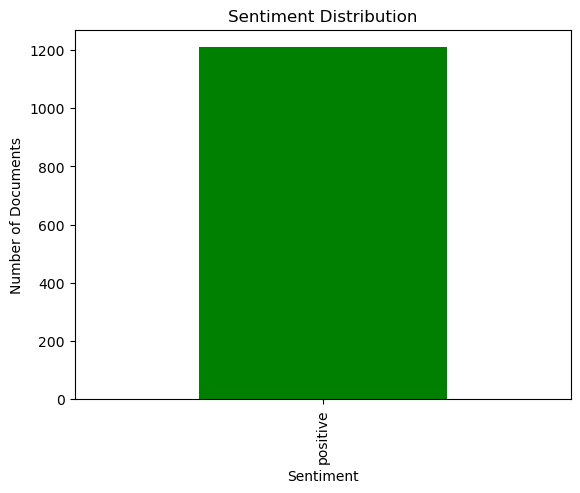

In [37]:
# Calculate the sentiment distribution
sentiment_distribution = dfi['Sentiment'].value_counts()

# Plotting
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Documents')
plt.show()

## Load Sentiment-Labelled Wordlist


In [42]:
wordlist_df = pd.read_excel('/Users/orkestro/Downloads/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist.xlsx')


In [43]:
wordlist_df.head()
wordlist_df.describe()

,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
count,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000
mean,0.606959,0.092268,0.076546,0.233247,0.004897,0.006959,0.047423
std,0.488489,0.289441,0.265905,0.422953,0.069815,0.083139,0.212569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
print(wordlist_df.columns)

Index(['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong',
       'Weak', 'Constraining'],
      dtype='object')


In [49]:
## Distribution of Positive vs. Negative Words

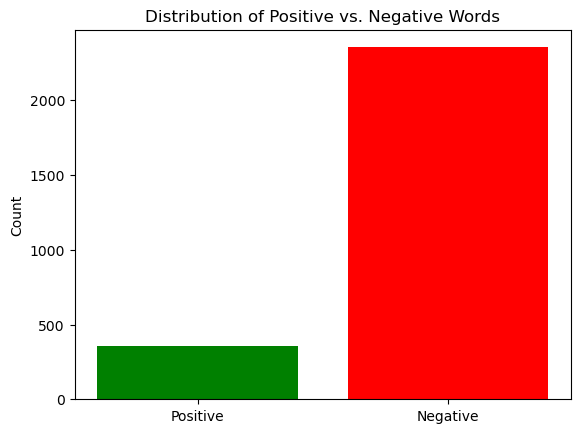

In [47]:
positive_count = wordlist_df['Positive'].sum()
negative_count = wordlist_df['Negative'].sum()

plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['green', 'red'])
plt.title('Distribution of Positive vs. Negative Words')
plt.ylabel('Count')
plt.show()

## Distribution of Other Sentiment Categories

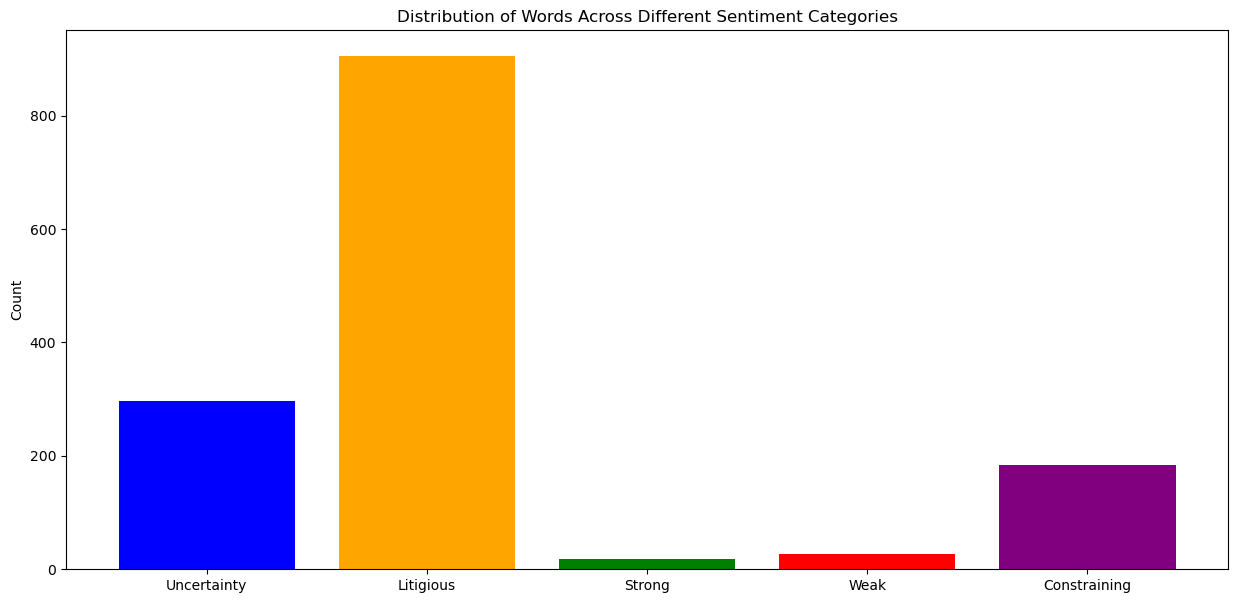

In [48]:
categories = ['Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining']
counts = [wordlist_df[col].sum() for col in categories]

plt.figure(figsize=(15, 7))
plt.bar(categories, counts, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Distribution of Words Across Different Sentiment Categories')
plt.ylabel('Count')
plt.show()b

In [57]:
wordlist_df['Word'] = wordlist_df['Word'].str.lower()

## Clean the speech text

In [60]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize
    tokens = text.split()
    return tokens

# If dfi is not already pre-processed
dfi['cleaned_speech'] = dfi['text'].apply(clean_text)

## Compute sentiment scores using the wordlist

In [62]:
def compute_sentiment_score(tokens):
    score = 0
    for token in tokens:
        if token in wordlist_df['Word'].values:
            score += wordlist_df.loc[wordlist_df['Word'] == token, 'Positive'].values[0] - wordlist_df.loc[wordlist_df['Word'] == token, 'Negative'].values[0]
    return score

dfi['sentiment_score'] = dfi['cleaned_speech'].apply(compute_sentiment_score)

## Check the sentiment scores

In [63]:
print(dfi['sentiment_score'].describe())

count    1209.000000
mean      -34.688999
std        69.114510
min      -979.000000
25%       -55.000000
50%       -26.000000
75%        -2.000000
max       485.000000
Name: sentiment_score, dtype: float64
